# SoC final Project: Stock Market Prediction using LSTM

Starting of I imported all the libraries which were required.

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


AttributeError: partially initialized module 'yfinance' has no attribute 'download' (most likely due to a circular import)

Fetching the input data from the user regarding the ticker, the starting and end date and the timeframe.

Also downloading the data based on this user input.

In [ ]:
ticker = input("Enter the ticker symbol: ")
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")
timeframe = input("Enter the timeframe (e.g., 1d, 1wk, 1mo): ")
data = yf.download(ticker, start=start_date, end=end_date, interval=timeframe)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15696\710017323.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval=timeframe)
[*********************100%***********************]  1 of 1 completed


Data visualisation using matplotlib and the seaborn libraries.

In [ ]:
def plot_data(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price')
    plt.title(f'{ticker} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()


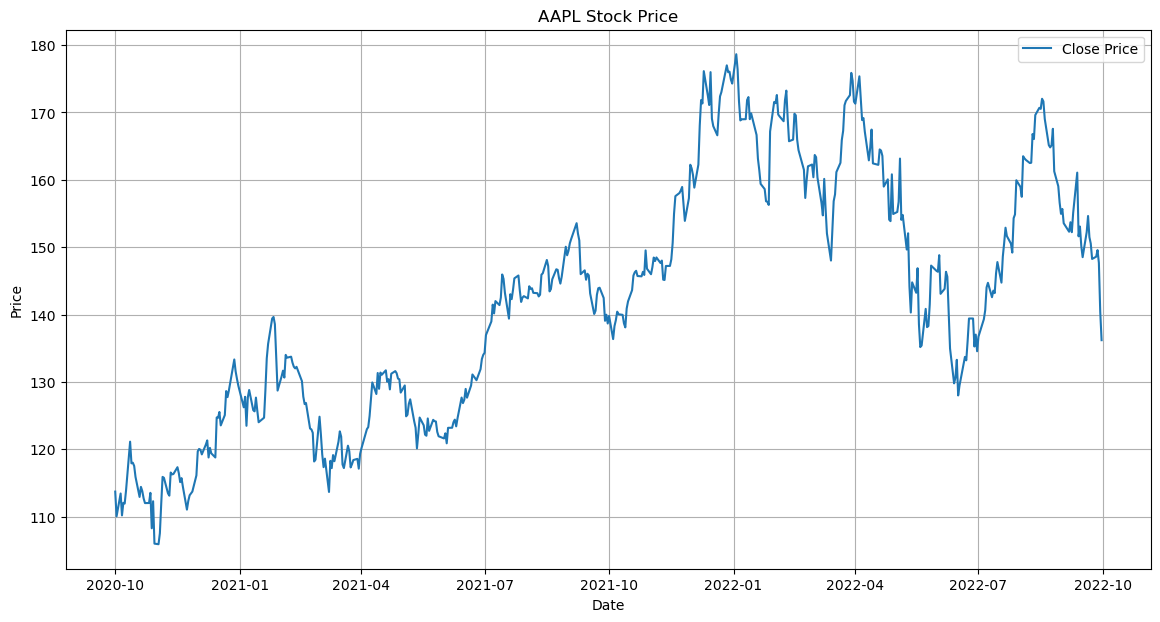

In [ ]:
plot_data(data)
# Data visualisation using matplotlib and the seaborn libraries.

Also used various technical indicators as well while visualising the data, as it would be better to analyse it.

In [ ]:
def MACD(data, short_window=12, long_window=26, signal_window=9):
    exp1 = data['Close'].ewm(span=short_window, adjust=False).mean()
    exp2 = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

def RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def Bollinger_Bands(data, window=20, num_std_dev=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band, lower_band

In [ ]:
def plot_technical_indicators(data):
    macd, signal = MACD(data)
    rsi = RSI(data)
    upper_band, lower_band = Bollinger_Bands(data)

    plt.figure(figsize=(14, 10))

    plt.subplot(3, 1, 1)
    plt.plot(data['Close'], label='Close Price')
    plt.plot(upper_band, label='Upper Band', linestyle='--')
    plt.plot(lower_band, label='Lower Band', linestyle='--')
    plt.title(f'{ticker} Bollinger Bands')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(macd, label='MACD', color='blue')
    plt.plot(signal, label='Signal Line', color='orange')
    plt.title('MACD')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(rsi, label='RSI', color='purple')
    plt.axhline(70, linestyle='--', alpha=0.5, color='red')
    plt.axhline(30, linestyle='--', alpha=0.5, color='green')
    plt.title('RSI')
    plt.legend()

    plt.tight_layout()
    plt.show()

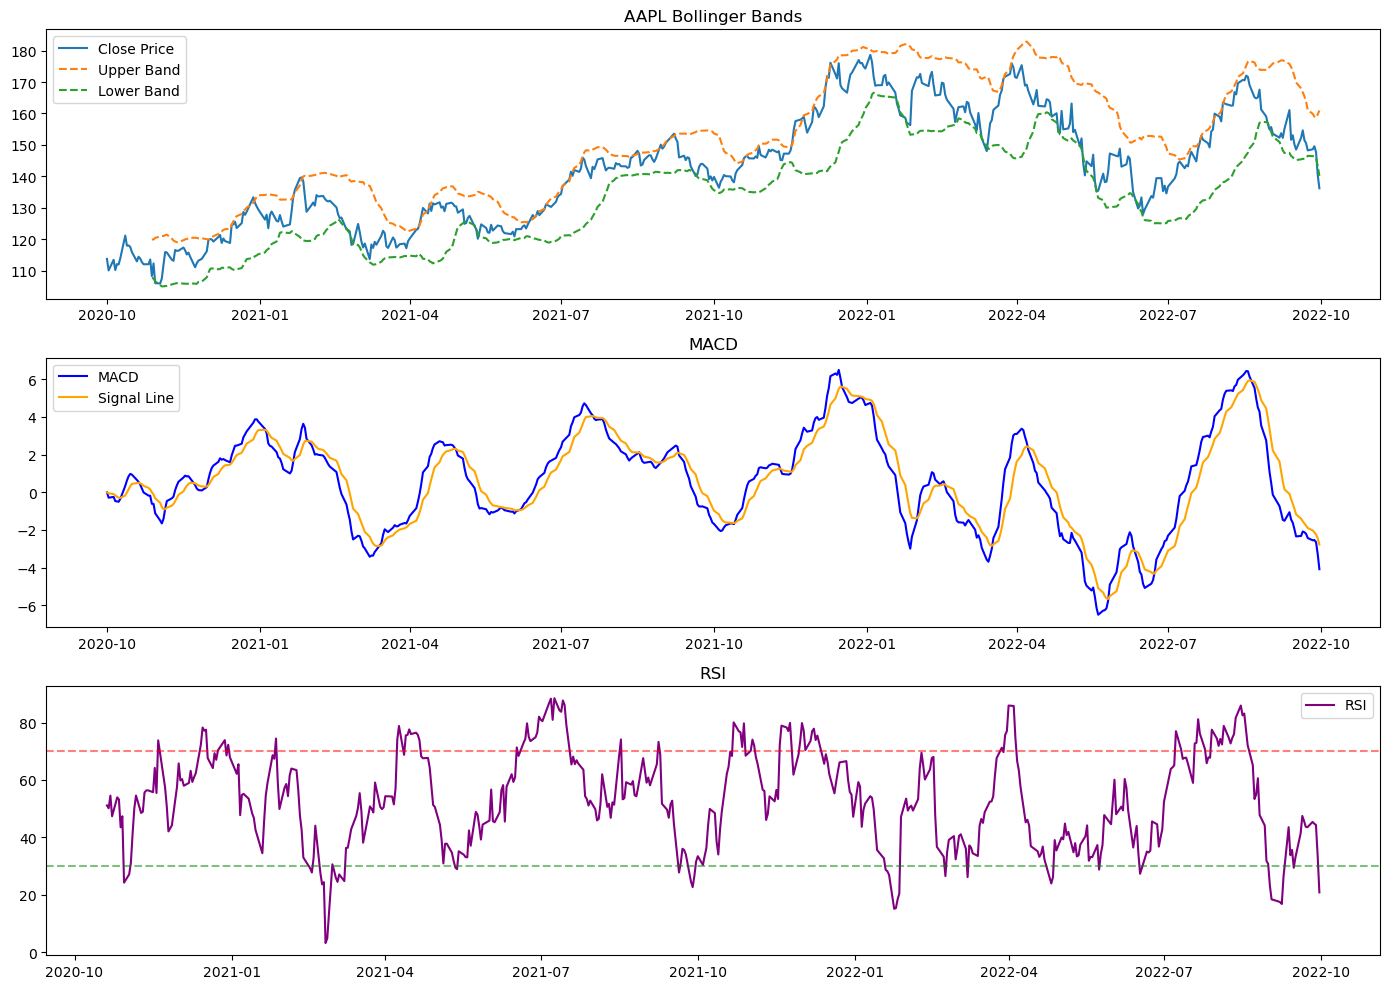

In [ ]:
plot_technical_indicators(data)
# Also used various technical indicators as well while visualising the data, as it would be better to analyse it.

Let us now build the LSTM model using tensorflow library.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
model = create_lstm_model((data.shape[1], 1))
model.summary()

NameError: name 'data' is not defined